# Unit 5 - Financial Planning


In [86]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

# date here
from datetime import date


%matplotlib inline

In [87]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

## Collect Crypto Prices Using the `requests` Library

In [88]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc  =  1.2
my_eth = 5.3

In [89]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [90]:
# response_data = requests.get(create_deck_url).json()
# response_data
btc_resp = requests.get(btc_url).json()
btc_price = btc_resp['data']['1']['quotes']['USD']['price']
my_btc_value =my_btc * btc_price

eth_resp =  requests.get(eth_url).json()
eth_price = eth_resp['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_price

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60618.00
The current value of your 5.3 ETH is $12252.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [91]:
# Current amount of shares
# Create two variables named my_agg and my_spy and set them equal to 200 and 50, respectively.
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [92]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [93]:
# Format current date as ISO format
# YOUR CODE HERE!
# use  "2021-04-16" so weekend gives actual data
start_date = pd.Timestamp("2021-04-16", tz="America/New_York").isoformat()
today_date = pd.Timestamp(date.today(), tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=start_date,
).df
# Preview DataFrame
# YOUR CODE HERE!
ticker_data

AGG                                      SPY  \
                             open     high    low   close   volume    open   
time                                                                         
2021-04-16 00:00:00-04:00  114.56  114.665  114.5  114.54  3488514  417.25   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-16 00:00:00-04:00  417.91  415.73  417.31  66624780

In [94]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = ticker_data['AGG']['close'][0]
spy_close_price  = ticker_data['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $114.54
Current SPY closing price: $417.31


In [95]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20865.50
The current value of your 200 AGG shares is $22908.00


### Savings Health Analysis

In [96]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame([my_btc_value+ my_eth_value, my_spy_value + my_agg_value], columns = ['amount'], index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

amount
crypto  72870.593
shares  43773.500

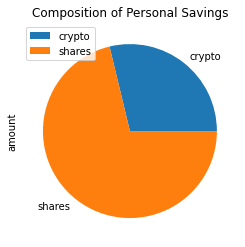

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!

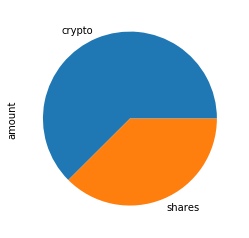

In [97]:
df_savings['amount'].plot.pie(y= ['crypto', 'shares'])
# how to put label

In [98]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_saving = df_savings['amount'].sum()

# Validate saving health
# YOUR CODE HERE!

#     If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
#     If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
#     If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

if total_saving >  emergency_fund:
    print ('Congratulations! You have enough money in your emergency fund.')
elif total_saving == emergency_fund:
    print ('Contratulations you reached your financial goals ')
else:
    print ('You are making great progress. You need to save $ {round((emergency_fund - total_saving), 2)}')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

#### Hassan's Note for some reason AlPaca would not let me get more than 1000 records. To get 5 years data (252 * 5), I had to break it up into two reads and concat the data. 

In [51]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
start_date2 = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
# end_date1 = pd.Timestamp('2019-08-07', tz='America/New_York').isoformat()
# hits 1000 item limit, have to do in two batches and pringt

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [ ]:
# create two dataframes and concaternate them
df_stock_data1 = api.get_barset(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1,
    limit = 1000
).df

df_stock_data2 = api.get_barset(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1,
    limit = 1000
).df



In [55]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data

# to fix.
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                              SPY                                    
                             open    high     low   close    volume  
time                                                                 
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207  
2016-08-24 00:00:00-04:00  218.82  218.91  217.36  217.88  50310103

In [66]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [67]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732   
2016-08-24 00:00:00-04:00  112.79  112.8000  112.6290  112.660  2071970   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-18 00:00:00-04:00          NaN  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   
2016-08-24 00:00:00-04:00    -0.000266  218.82  218.91  217.36  217.88   

                                                  
                             volume daily_return  
time                                              
2016-08-18 00:00:00-04:00  42850145          NaN  
2016-08-19 00:00:00-04:00  52238224    -0.001371  
2016-08-22 00:00:00-04:00  48628907    -0.000320  
2016-08-23 00:00:00-04:00  41981207     0.002014  
2016-08-24 00:00:00-04:00  50310103    -0.004842

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1          2          3          4          5    \
0      1.000000  1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.018353  0.990991   0.993542   1.004285   1.010543   0.996096   
2      1.014560  0.992820   0.996145   1.002978   1.005147   1.004685   
3      1.019269  1.001492   1.009462   1.014306   1.001689   1.025238   
4      1.014859  1.003336   1.004606   1.019190   1.003226   1.018442   
...         ...       ...        ...        ...        ...        ...   
7556  13.864071  6.077511  11.731330  31.243365  30.053930  14.757036   
7557  13.746201  6.059207  11.585533  31.287242  30.582049  14.673008   
7558  13.599568  6.013279  11.615333  31.745904  30.424040  14.651556   
7559  13.777501  5.987253  11.684295  31.652897  30.570575  14.567353   
7560  13.797608  5.990874  11.683965  31.599752  30.432076  14.479116   

           6          7         8          9    ...       490       491  \
0     1.000000   1.000000  1.000000   1.000000  ...  1.000000  1.000000   
1     1.004661   1.009838  1.000822   0.996604  ...  0.989897  1.000037   
2     1.001202   1.010342  0.993041   0.992330  ...  0.988645  1.007607   
3     0.996099   1.011401  0.994015   0.994844  ...  0.986177  1.005196   
4     0.993964   1.005165  1.001041   1.002201  ...  0.992091  1.001366   
...        ...        ...       ...        ...  ...       ...       ...   
7556  2.210814  15.528460  7.255163  16.637307  ...  5.822107  2.259562   
7557  2.186417  15.436076  7.339485  16.766272  ...  5.823840  2.253127   
7558  2.171581  15.329036  7.283202  16.707132  ...  5.856829  2.229323   
7559  2.180296  15.222299  7.293879  16.740933  ...  5.890849  2.237878   
7560  2.200144  15.233276  7.303912  16.756515  ...  5.900159  2.221008   

           492       493       494        495        496       497       498  \
0     1.000000  1.000000  1.000000   1.000000   1.000000  1.000000  1.000000   
1     1.012813  1.001722  1.000656   1.002117   1.003528  1.002606  0.991949   
2     1.020869  1.005857  1.006082   0.996915   1.004331  0.990710  0.987952   
3     1.031488  1.005400  1.002427   0.999050   1.002731  0.979590  0.999434   
4     1.029699  1.021144  0.997660   1.006650   0.990625  0.980227  1.004842   
...        ...       ...       ...        ...        ...       ...       ...   
7556  3.783502  5.828729  4.720930  35.072331  14.912683  5.653658  5.648629   
7557  3.775175  5.815855  4.766911  35.030715  15.116486  5.676312  5.688687   
7558  3.777023  5.802119  4.840632  35.167994  15.167563  5.681892  5.727080   
7559  3.812925  5.792500  4.856454  34.870746  15.323380  5.679676  5.710282   
7560  3.840263  5.855725  4.790127  34.967825  15.355808  5.619571  5.727143   

           499  
0     1.000000  
1     0.997364  
2     0.991272  
3     0.989640  
4     0.984748  
...        ...  
7556  6.315486  
7557  6.379419  
7558  6.358350  
7559  6.373808  
7560  6.340223  

[7561 rows x 500 columns]

In [68]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4         5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000  1.000000   
1      1.003160   0.993522   0.992124   0.988972   0.998894  0.990773   
2      0.998271   0.987536   0.990773   0.993786   1.005093  0.994374   
3      1.000801   0.979485   1.007891   1.011773   1.009605  1.000677   
4      1.002190   0.975239   1.008450   1.010586   1.018224  0.999619   
5      0.996767   0.987355   1.013545   1.012514   1.006432  0.997104   
6      0.984863   0.990251   1.019863   1.017088   1.007026  1.001973   
7      0.986408   0.982577   1.023297   1.003593   1.011734  1.011023   
8      0.980999   0.974771   1.021177   1.013488   1.016323  1.020833   
9      0.975484   0.980058   1.013432   1.020415   1.025108  1.029728   
10     0.972078   0.984939   1.014393   1.009596   1.032124  1.017979   
11     0.974383   0.984189   1.019210   1.008981   1.034678  1.024665   
12     0.974958   0.989121   1.011782   1.018294   1.027471  1.029147   
13     0.985068   0.993781   1.014046   1.028665   1.034281  1.015865   
14     0.995245   0.976194   1.018956   1.010336   1.036070  1.021829   
15     0.972511   0.974814   1.027773   1.013037   1.032935  1.028955   
16     0.977408   0.972357   1.030387   1.017841   1.034754  1.026242   
17     0.977740   0.992768   1.028945   1.019786   1.027185  1.026858   
18     0.976293   0.998376   1.029641   1.016059   1.026769  1.033482   
19     0.966896   0.985669   1.029033   1.014689   1.043563  1.033570   
20     0.965392   0.991065   1.030866   1.011177   1.035208  1.035377   
21     0.959176   0.985233   1.031799   1.023043   1.042978  1.027206   
22     0.949210   0.979559   1.023843   1.003519   1.046410  1.034733   
23     0.944512   0.977463   1.017990   1.004234   1.046960  1.027188   
24     0.932417   0.968334   1.023643   1.001498   1.041825  1.025556   
25     0.926840   0.978138   1.021460   1.006319   1.050772  1.025802   
26     0.920577   0.986524   1.008879   1.014359   1.058366  1.019747   
27     0.913672   0.978762   0.993233   1.007146   1.061809  1.013828   
28     0.909894   0.986760   0.993546   1.011751   1.075270  1.014021   
29     0.892141   0.992384   0.996734   1.012725   1.074061  1.015251   
...         ...        ...        ...        ...        ...       ...   
7531  10.495835  25.229409  11.846309  17.227797  19.245331  3.086217   
7532  10.520049  24.916968  11.893756  17.241656  19.392225  3.084680   
7533  10.443732  24.656864  11.858613  17.246114  19.318343  3.105480   
7534  10.456302  24.615736  11.856781  17.306086  19.348687  3.098098   
7535  10.392412  24.520400  11.760115  17.243197  19.443522  3.106838   
7536  10.365333  24.577126  11.791460  17.332634  19.081845  3.106183   
7537  10.303767  24.707547  11.809113  17.303960  19.003173  3.176392   
7538  10.290119  24.496577  11.685099  17.365565  18.909730  3.162531   
7539  10.296606  24.642557  11.769057  17.385541  18.718745  3.155612   
7540  10.131117  24.679468  11.681730  17.348956  18.685194  3.187867   
7541  10.079254  24.572302  11.615370  17.326522  18.680962  3.237781   
7542  10.035540  24.713082  11.758214  17.361925  18.717718  3.246464   
7543   9.977689  24.909246  11.768788  17.395862  18.698716  3.222279   
7544  10.026090  25.051316  11.656872  17.282792  18.775506  3.223139   
7545  10.008825  25.202080  11.561467  17.259502  18.959810  3.207583   
7546  10.107290  24.978150  11.523829  17.222046  18.968058  3.255669   
7547  10.087887  25.109097  11.647875  17.297773  19.142455  3.261336   
7548  10.108814  25.388242  11.560568  17.200827  19.228259  3.286665   
7549  10.087340  25.445940  11.590430  17.266646  19.139287  3.252444   
7550   9.994304  25.511209  11.497899  17.102785  19.136231  3.270835   
7551   9.955518  25.444807  11.437200  17.107017  19.422641  3.278682   
7552   9.952326  25.566402  11.413625  17.007442  19.416644  3.299182   
7553  10.108926  25.613391  11.436974  17.005590  19.536373  3.299595 

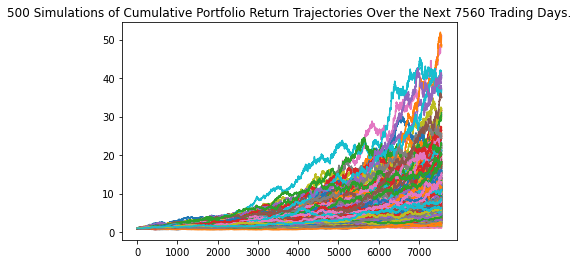

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!

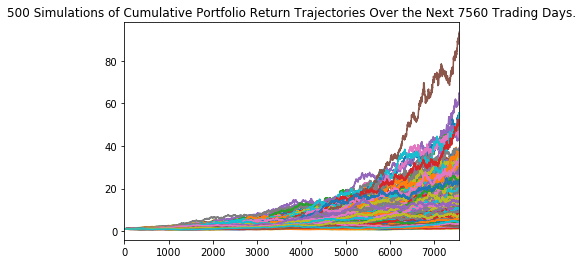

In [69]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

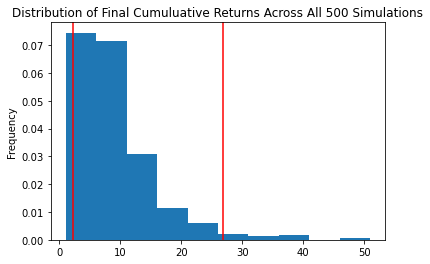

In [20]:
# delete
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

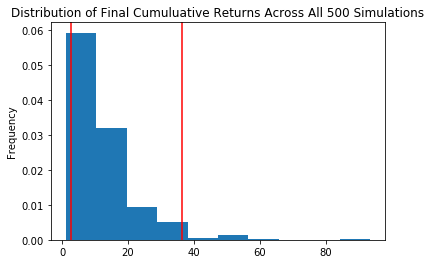

In [70]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [21]:
# delete
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              9.200762
std               6.659594
min               1.045214
25%               4.941116
50%               7.381182
75%              11.327780
max              50.993592
95% CI Lower      2.296975
95% CI Upper     26.810558
Name: 7560, dtype: float64


In [71]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print (tbl)

count           500.000000
mean             12.342028
std              10.024064
min               1.129177
25%               5.967958
50%               9.477940
75%              15.058517
max              93.479264
95% CI Lower      2.673294
95% CI Upper     36.532346
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# delete
# # Set initial investment
# initial_investment = 20000

# # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# # YOUR CODE HERE!

# # Print results
# print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
#       f" over the next 30 years will end within in the range of"
#       f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45939.5 and $536211.17


In [72]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53465.88 and $730646.92


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# delete
# # Set initial investment
# initial_investment = 20000 * 1.5

# # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# # YOUR CODE HERE!

# # Print results
# print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
#       f" over the next 30 years will end within in the range of"
#       f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68909.24 and $804316.75


In [73]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $80198.82 and $1095970.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [74]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002773  0.995921  0.995673  0.994602  1.005021  0.998532  1.001126   
2     1.004519  0.994920  0.995504  0.997885  0.999418  1.002665  0.998714   
3     1.003420  0.989709  0.994363  1.001670  1.004349  1.002377  1.001845   
4     0.999165  0.990064  0.986792  1.003455  1.007765  1.007514  0.997581   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.266580  1.196174  1.233861  1.609848  1.173492  1.242440  1.329611   
1257  1.259830  1.201814  1.231141  1.621046  1.172662  1.239173  1.331916   
1258  1.265916  1.196261  1.226184  1.622075  1.174943  1.240829  1.335755   
1259  1.268268  1.202293  1.223321  1.623647  1.170809  1.248084  1.336792   
1260  1.275078  1.204666  1.221803  1.620920  1.170916  1.244088  1.333824   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.005124  0.994500  0.999171  ...  1.002697  1.007377  0.999067   
2     1.009062  0.992389  0.997706  ...  1.004034  1.008911  0.999323   
3     1.011481  0.991912  0.994580  ...  1.002351  1.006664  1.002174   
4     1.015886  0.986637  0.998216  ...  1.002834  0.999865  1.000353   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.157732  1.354542  0.980124  ...  1.193369  1.265576  1.176646   
1257  1.157722  1.354061  0.980815  ...  1.194320  1.269009  1.182694   
1258  1.157986  1.350916  0.981539  ...  1.203336  1.271746  1.178878   
1259  1.162289  1.341674  0.977214  ...  1.200892  1.273981  1.175435   
1260  1.162788  1.346848  0.974308  ...  1.198225  1.272588  1.179043   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997822  0.998338  1.003092  0.997770  1.005395  0.999348  1.005300  
2     1.000654  0.999466  1.004265  0.994733  1.003748  0.996511  1.012382  
3     0.998934  1.003854  1.010202  0.996131  1.002018  0.999665  1.014892  
4     1.003079  1.003303  1.012221  0.997754  1.000544  1.001517  1.013704  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.146853  1.214548  1.145207  1.193672  1.131104  1.003777  1.234636  
1257  1.146907  1.213701  1.143455  1.200143  1.131160  1.006530  1.234546  
1258  1.148263  1.213656  1.146064  1.197322  1.134041  1.005902  1.236184  
1259  1.145972  1.210717  1.146312  1.194024  1.132655  1.007751  1.242664  
1260  1.141526  1.218961  1.151264  1.193754  1.134594  1.007345  1.243278  

[1261 rows x 500 columns]

In [75]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.014747  1.002291  1.002192  0.994660  1.002989  1.008973  0.992425   
2     1.009120  1.007306  1.005153  0.985686  0.980901  1.005832  1.001412   
3     1.006890  1.011464  0.995120  0.993030  0.967152  1.001244  1.001821   
4     1.013128  0.997433  0.994728  0.989080  0.976044  1.002011  0.996748   
5     1.009446  0.991753  0.996723  0.972211  0.976579  1.004529  1.008728   
6     1.023672  0.997511  0.998845  0.988966  0.976140  1.022210  0.999934   
7     1.020033  0.994704  0.996236  0.994611  0.976364  1.024885  1.011234   
8     1.026770  0.995291  0.997461  1.005067  0.983231  1.025973  1.010408   
9     1.033950  1.000004  1.002544  0.990832  0.987393  1.030833  1.011403   
10    1.027157  1.000955  1.004788  0.990770  0.992924  1.032161  1.018292   
11    1.018987  0.999942  1.015195  0.992409  0.997970  1.039437  1.020043   
12    1.021104  1.008566  1.012458  1.010146  1.007361  1.044352  1.023653   
13    1.015230  1.008991  1.017052  1.009176  1.024886  1.043954  1.018915   
14    1.011811  0.997023  1.032537  1.000827  1.019743  1.037213  1.023213   
15    1.013182  0.997326  1.035715  1.010570  1.025531  1.043311  1.017214   
16    1.003917  1.002424  1.029352  1.012122  1.033662  1.051352  1.022715   
17    1.023851  1.006622  1.027909  1.007939  1.037152  1.053657  1.024231   
18    1.016346  0.998468  1.025802  1.014493  1.038808  1.043911  1.035639   
19    1.009774  0.985309  1.024272  1.015991  1.030660  1.050439  1.043384   
20    1.017209  0.975669  1.033654  1.020843  1.027393  1.053746  1.034247   
21    1.007745  0.972057  1.027764  1.031778  1.022383  1.054895  1.036008   
22    1.007513  0.970069  1.034687  1.037942  1.027862  1.053408  1.038560   
23    0.997076  0.965288  1.032916  1.041615  1.019691  1.061033  1.031486   
24    0.997739  0.959019  1.040207  1.041567  1.013057  1.070518  1.033771   
25    1.003508  0.964367  1.039137  1.037643  1.031711  1.081030  1.043666   
26    0.996502  0.962441  1.042997  1.045451  1.028888  1.080369  1.054231   
27    0.999179  0.960396  1.043339  1.052818  1.034683  1.080415  1.062664   
28    0.994595  0.952483  1.023371  1.049344  1.038857  1.089901  1.058973   
29    1.007398  0.945946  1.018163  1.040958  1.032195  1.078745  1.057787   
...        ...       ...       ...       ...       ...       ...       ...   
1231  0.977165  1.016740  1.081595  1.081856  3.074181  2.438206  1.228196   
1232  0.971529  1.012669  1.083703  1.069742  3.043250  2.418310  1.226620   
1233  0.977614  1.014677  1.091043  1.069321  3.055075  2.440059  1.227180   
1234  0.985820  1.006067  1.108695  1.082812  3.076283  2.428798  1.242239   
1235  0.979523  1.002193  1.107510  1.069950  3.097105  2.398290  1.243119   
1236  0.977145  0.984135  1.111711  1.074754  3.148807  2.415198  1.240977   
1237  0.966717  0.977242  1.122558  1.074976  3.163022  2.436206  1.244521   
1238  0.955393  0.972249  1.122755  1.078719  3.143413  2.427278  1.250275   
1239  0.958829  0.972641  1.121771  1.067323  3.140871  2.461825  1.249835   
1240  0.966109  0.976674  1.118196  1.055892  3.116818  2.469900  1.228177   
1241  0.965806  0.968657  1.124284  1.059150  3.126176  2.480105  1.240174   
1242  0.960793  0.962003  1.122938  1.078657  3.129178  2.439844  1.266362   
1243  0.962769  0.966567  1.137439  1.086222  3.120209  2.393703  1.271363   
1244  0.970573  0.978756  1.146845  1.097127  3.147804  2.370804  1.264438   
1245  0.974979  0.969571  1.155967  1.093268  3.136320  2.368769  1.255627   
1246  0.974651  0.968959  1.165416  1.088801  3.150991  2.354379  1.247711   
1247  0.977979  0.976056  1.169859  1.107989  3.175157  2.348601  1.252081   
1248  0.980936  0.981110  1.166903  1.113170  3.176707  2.329743  1.261079   
1249  0.986153  0.971157  1.162512  1.121430  3.158325  2.336093  1.248300   
1250  0.990622  0.964108  1.15478

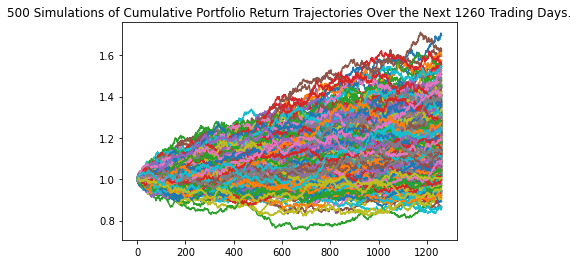

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

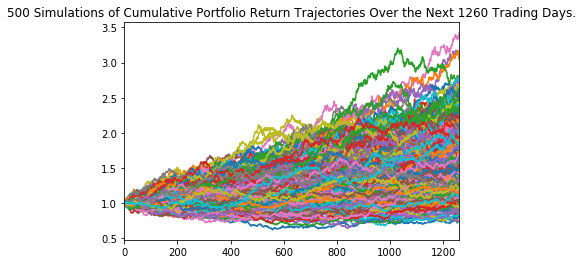

In [76]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

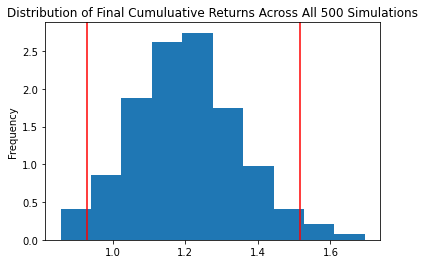

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

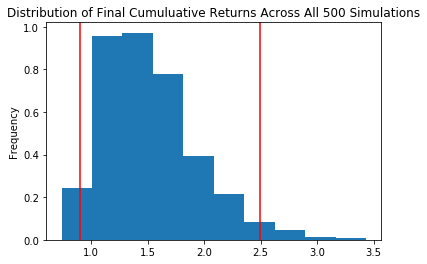

In [77]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.202273
std               0.145565
min               0.856322
25%               1.100622
50%               1.197687
75%               1.292270
max               1.695081
95% CI Lower      0.928556
95% CI Upper      1.517173
Name: 1260, dtype: float64


In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print (tbl)

count           500.000000
mean              1.517079
std               0.418347
min               0.738593
25%               1.206852
50%               1.451215
75%               1.750954
max               3.431924
95% CI Lower      0.902995
95% CI Upper      2.493089
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


In [80]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54179.7 and $149585.32


### Ten Years Retirement Option

In [81]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997817  0.998428  1.000816  1.000202  1.002120  0.998788  1.004226   
2     0.994703  0.996223  1.001987  0.998816  1.002372  0.996708  1.009074   
3     0.994115  0.993375  0.992622  1.001069  0.999700  1.000123  1.011610   
4     0.999040  0.997821  0.992272  0.999767  1.000459  1.006178  1.008906   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.164254  1.246948  1.441080  1.685210  1.702114  1.474774  1.535126   
2517  2.169555  1.246315  1.436260  1.685058  1.697652  1.479128  1.536203   
2518  2.169089  1.243387  1.426446  1.685480  1.714264  1.479079  1.537777   
2519  2.170695  1.238881  1.419187  1.670521  1.720418  1.478161  1.544292   
2520  2.166411  1.238568  1.422756  1.668923  1.720600  1.480128  1.538224   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.004250  1.001431  1.000740  ...  0.995519  1.001253  1.000492   
2     1.006986  1.006219  0.995591  ...  0.991815  1.001091  1.003774   
3     1.009254  1.012194  0.998619  ...  0.992699  1.003085  1.005997   
4     1.009897  1.014282  0.995619  ...  0.997683  1.007825  1.007858   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.288182  1.138653  1.500977  ...  1.367442  1.357662  1.661583   
2517  1.288485  1.144082  1.498097  ...  1.366833  1.360457  1.672969   
2518  1.289258  1.140795  1.496271  ...  1.368088  1.357853  1.662915   
2519  1.296500  1.137510  1.499085  ...  1.370125  1.359697  1.664317   
2520  1.292365  1.138481  1.501295  ...  1.368816  1.361692  1.666635   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994026  1.006129  1.002356  1.005233  0.999769  1.002106  1.003746  
2     0.989341  1.007530  1.009809  1.007273  0.999666  1.006340  0.998303  
3     0.991536  1.004239  1.010765  1.009501  0.999652  1.011737  0.998762  
4     0.991188  1.009171  1.009303  1.008223  1.003270  1.014350  1.001691  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.348599  1.649220  1.782632  1.450872  1.701338  1.199957  1.171159  
2517  1.351751  1.646287  1.781356  1.459438  1.695322  1.197466  1.171882  
2518  1.354957  1.637911  1.781046  1.451367  1.695901  1.201111  1.172847  
2519  1.352170  1.633762  1.778638  1.443413  1.699061  1.191529  1.166331  
2520  1.349637  1.633255  1.781666  1.442561  1.699977  1.197157  1.165888  

[2521 rows x 500 columns]

In [82]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.005213  0.995423  0.996192  0.990371  1.014314  1.003857  1.000039   
2     1.002796  0.992009  0.994069  0.987006  1.023093  0.998991  0.993348   
3     1.004039  0.999994  0.984182  0.991634  1.026980  1.000043  0.997479   
4     1.024788  1.006879  0.976774  0.987546  1.022010  1.004814  0.998614   
5     1.010272  1.002088  0.968433  0.974404  1.021581  1.018690  0.998935   
6     1.018388  1.005390  0.960204  0.975096  1.026378  1.015030  0.994592   
7     1.020715  0.994865  0.955360  0.979752  1.011497  1.001393  0.994102   
8     1.024170  0.996702  0.936195  0.987501  1.001358  1.002371  0.995107   
9     1.025580  0.979362  0.933793  0.983672  0.987754  0.995296  0.999266   
10    1.038086  0.982333  0.933107  0.995061  0.984846  0.993095  0.995166   
11    1.028388  0.985083  0.922668  1.004884  0.978004  0.991768  0.992832   
12    1.030153  0.988994  0.916816  0.994400  0.980242  0.992454  0.984622   
13    1.030792  0.991858  0.918901  1.006380  0.981315  0.996261  0.985843   
14    1.019833  0.986833  0.923082  1.013447  0.992348  1.000306  0.988627   
15    1.019085  0.992095  0.930653  1.013726  0.993932  1.000585  0.992249   
16    1.023520  0.999659  0.922182  1.028142  0.997596  1.003863  0.978568   
17    1.042828  1.007545  0.926053  1.042769  0.986077  1.001030  0.965774   
18    1.038467  1.005703  0.920166  1.033842  0.980142  1.001942  0.972330   
19    1.034621  1.012399  0.921028  1.044978  0.974551  1.006308  0.971487   
20    1.029148  1.017961  0.925989  1.032393  0.972169  1.006581  0.965109   
21    1.042897  1.021625  0.925670  1.043341  0.983481  1.007141  0.975338   
22    1.036645  1.026793  0.933783  1.039681  0.982557  1.012149  0.975565   
23    1.045788  1.033434  0.938712  1.044422  0.985998  1.013365  0.983851   
24    1.041624  1.030802  0.931057  1.050901  0.994873  1.010204  0.986530   
25    1.036302  1.026549  0.934336  1.056694  0.998238  1.006581  0.990594   
26    1.032027  1.010815  0.934293  1.052362  1.009656  1.007825  0.979900   
27    1.022771  1.013305  0.925521  1.058808  1.018471  1.004976  0.981385   
28    1.026495  1.014273  0.920406  1.063816  1.011188  1.011430  0.980899   
29    1.027431  1.019136  0.906648  1.070413  1.002174  0.995087  0.983254   
...        ...       ...       ...       ...       ...       ...       ...   
2491  2.249385  3.776528  2.712430  4.231594  1.294151  5.529766  2.522527   
2492  2.271765  3.763790  2.726446  4.215031  1.308827  5.540094  2.538355   
2493  2.277129  3.777624  2.718731  4.171268  1.314346  5.553040  2.526228   
2494  2.313249  3.759944  2.709675  4.189510  1.310675  5.548548  2.494654   
2495  2.298425  3.717053  2.740653  4.207737  1.312821  5.519237  2.495278   
2496  2.317544  3.745470  2.729305  4.232928  1.311204  5.523736  2.506226   
2497  2.317752  3.681431  2.753805  4.253137  1.311723  5.534328  2.518374   
2498  2.315551  3.672558  2.766466  4.263082  1.320511  5.575457  2.482749   
2499  2.335751  3.677499  2.740164  4.265656  1.328389  5.549291  2.491068   
2500  2.330599  3.697680  2.735756  4.267422  1.300074  5.482012  2.487633   
2501  2.364947  3.695052  2.739549  4.313715  1.308218  5.439940  2.499824   
2502  2.385501  3.673273  2.771227  4.306793  1.310395  5.541673  2.474675   
2503  2.435336  3.661284  2.742652  4.344047  1.305316  5.529765  2.443840   
2504  2.470199  3.677852  2.746326  4.316907  1.309734  5.517196  2.416455   
2505  2.474841  3.678927  2.723882  4.237115  1.298583  5.549510  2.396536   
2506  2.481277  3.672567  2.712079  4.257405  1.283201  5.552891  2.381700   
2507  2.453626  3.695086  2.720682  4.281899  1.285154  5.602916  2.364955   
2508  2.456768  3.708015  2.706497  4.280528  1.279741  5.558016  2.369572   
2509  2.446594  3.736713  2.711950  4.209701  1.280165  5.542423  2.379852   
2510  2.451970  3.751294  2.73165

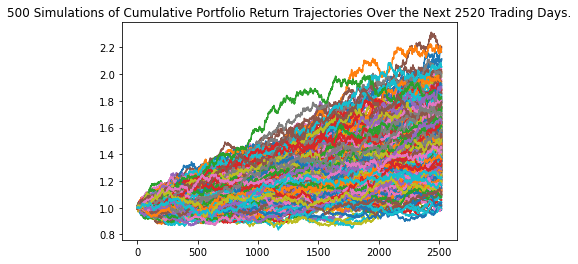

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

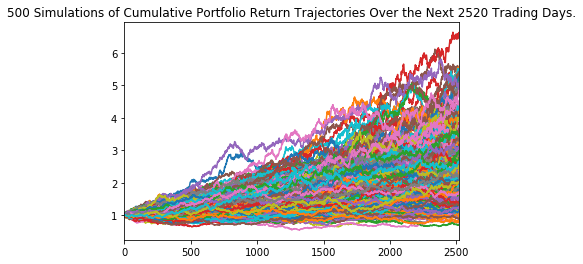

In [83]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

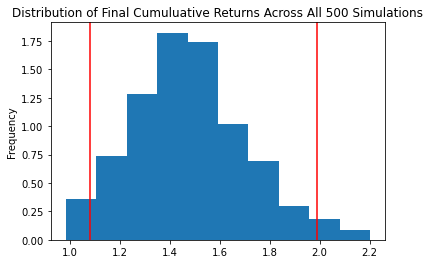

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

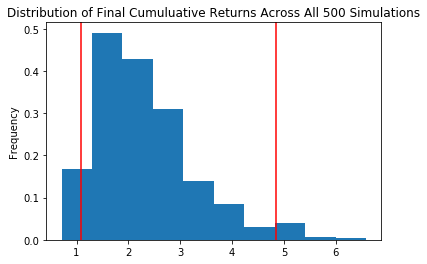

In [84]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [85]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print (tbl)

count           500.000000
mean              2.321692
std               0.952831
min               0.711434
25%               1.597404
50%               2.140931
75%               2.795891
max               6.578807
95% CI Lower      1.084259
95% CI Upper      4.851037
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
